Laboratorio 4
Se tiene la siguiente ecuación:
$$
s =  \sum_{n=1}^{N} \frac{1}{n^{3}+3n+1}a^b
$$


La cual es una sumatoria en donde N∈N, a y b∈ R. Además, se sabe que N es un número que como máximo debe ser 4 294 967 29 y que tanto a como b no requieren mucha resolución.

Se le pide realizar un análisis comparativo entre funciones en Python y C. El programa en C debe incluir lo siguiente:

a) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función usar la función pow para el cálculo del denominador y para el cálculo de a^b.


LABORATORIO 4 PEDRO MIGUEL BUSTAMANTE MELO 20206156

In [183]:
%%file funcion1.c

#include<stdio.h>
#include<math.h>

double primera_sumatoria_c(int N , double a ,double b){ 
    double s = 0.0;
    for ( int n=1 ; n<=N ; n++){
        int denominador = pow(n,3)+3*n +1;
        s += (double)1/ denominador;
        if(n > 429496729){ /* implemento la selectivo que indica cuando el numero supera al valor maximo propuesto para que la funcion pueda detenerse*/
            break;
        }  
    }
    s = s*pow(a,b);
    return s; 
}

/* int N dado que se trata de un numero natural */
/* double a y b dado que son numeros reales y van a ser necesario implementar decimales en los siguientes items*/
/* la salida sera double ya que la parte de la sumatoria al ser una fraccion , estará dentro de los valores de numeros reales*/

Overwriting funcion1.c


In [184]:
! gcc -c funcion1.c -o funcion1.o

In [185]:
! gcc -shared funcion1.o -o funcion1.so

b) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función solo usar la función pow para el cálculo de a^b.

In [186]:
%%file funcion2.c

#include<stdio.h>
#include<math.h>

double segunda_sumatoria_c(int N , double a ,double b){
    double s = 0.0;
    for ( int n=1 ; n<=N ; n++){
        int denominador = (n*n*n)+3*n +1;
        s += (double)1/ denominador; 
        if(n > 429496729){ /* implemento la selectivo que indica cuando el numero supera al valor maximo propuesto para que la funcion pueda detenerse*/
            break; 
        }    
    }
    s = s*pow(a,b);
    return s;
}

/* int N dado que se trata de un numero natural */
/* double a y b dado que son numeros reales y van a ser necesario implementar decimales en los siguientes items*/
/* la salida sera double ya que la parte de la sumatoria al ser una fraccion , estará dentro de los valores de numeros reales*/

Overwriting funcion2.c


In [187]:
! gcc -c funcion2.c -o funcion2.o

In [188]:
! gcc -shared funcion2.o -o funcion2.so

Un programa principal en Python donde se debe incluir:

c) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función usar la función pow para el cálculo del denominador y para el cálculo de a^b.


In [189]:
def primera_sumatoria_py(N,a,b):
    s=0
    for n in range(1,N+1):
        denominador = pow(n,3) + 3*n + 1
        s += 1/denominador
        if(n > 429496729):  #implemento la selectivo que indica cuando el numero supera al valor maximo propuesto para que la funcion pueda detenerse
            break
    s=s*pow(a,b)
    return s

d) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función solo usar la función pow para el cálculo de a^b.


In [190]:
def segunda_sumatoria_py(N,a,b):
    s=0
    for n in range(1,N+1):
        denominador = (n*n*n) + 3*n + 1
        s += 1/denominador
        if(n > 429496729): #implemento la selectivo que indica cuando el numero supera al valor maximo propuesto para que la funcion pueda detenerse
            break
    s=s*pow(a,b)
    return s

e) (2.0 punto) El llamado a la librería generada en C y los respectivos argumentos de entrada y de salida. Además, en comentarios, debe justificar los tipos de datos utilizados.



In [191]:
import ctypes

def ctypes_funcs():
 
    lib1 = ctypes.CDLL('./funcion1.so')


    lib1.primera_sumatoria_c.argtypes = [ctypes.c_int,ctypes.c_double,ctypes.c_double]
    lib1.primera_sumatoria_c.restype = ctypes.c_double

    lib2 = ctypes.CDLL('./funcion2.so')
    
    lib2.segunda_sumatoria_c.argtypes = [ctypes.c_int,ctypes.c_double,ctypes.c_double]
    lib2.segunda_sumatoria_c.restype = ctypes.c_double
    
    # funciones configuradas
    return lib1.primera_sumatoria_c, lib2.segunda_sumatoria_c

# PARA AMBAS FUNCIONES
# int N dado que se trata de un numero natural
# double a y b dado que son numeros reales y van a ser necesario implementar decimales en los siguientes items
# la salida sera double ya que la parte de la sumatoria al ser una fraccion , estará dentro de los valores de numeros reales

In [192]:
primera_sumatoria_c, segunda_sumatoria_c = ctypes_funcs()

f) (2.0 puntos) Validar que las 4 funciones dan los mismos resultados para los valores 1000, 3.5 y -0.25 para N,a y b, respectivamente.


In [193]:
N = 1000
a = 3.5
b = -0.25

suma1_c = primera_sumatoria_c(N,a,b) # creamos una instancia para cada funcion de C
suma2_c = segunda_sumatoria_c(N,a,b)

suma1_py = primera_sumatoria_py(N,a,b)
suma2_py = segunda_sumatoria_py(N,a,b)

print(f"Validacion de la primera funcion de C : {suma1_c}")
print(f"Validacion de la segunda funcion de C : {suma2_c}")
print(f"Validacion de la primera funcion de Python : {suma1_py}")
print(f"Validacion de la segunda funcion de Python : {suma2_py}")

Validacion de la primera funcion de C : 0.24081597314253528
Validacion de la segunda funcion de C : 0.24081597314253528
Validacion de la primera funcion de Python : 0.24081597314253528
Validacion de la segunda funcion de Python : 0.24081597314253528


g) (2.0 puntos) Realizar un análisis temporal de las 4 funciones considerando los datos del inciso f). Considerar graficar los tiempos para un valor de 50 iteraciones. Realizar comentarios acerca del resultado.


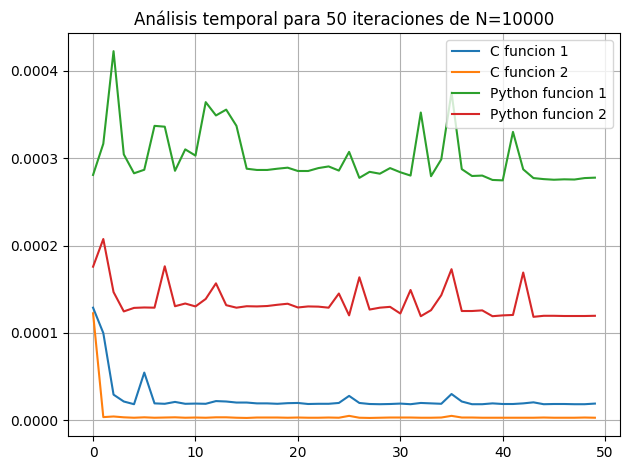

In [194]:
import time 
import matplotlib.pyplot as plt

N = 1000
a = 3.5
b = -0.25
iter = 50

c_time1= []
c_time2 = []
py_time1= []
py_time2= []


for i in range(iter):
    c_start_time1 = time.time()
    rpta1_c = primera_sumatoria_c(N,a,b)
    c_end_time1 = time.time()
    c_time1.append(c_end_time1 - c_start_time1) 

    c_start_time2 = time.time()
    rpta2_c = segunda_sumatoria_c(N,a,b)
    c_end_time2 = time.time()
    c_time2.append(c_end_time2 - c_start_time2)

    py_start_time1 = time.time()
    rpta1_py = primera_sumatoria_py(N,a,b)
    py_end_time1 = time.time()
    py_time1.append(py_end_time1 - py_start_time1)

    py_start_time2 = time.time()
    rpta2_py = segunda_sumatoria_py(N,a,b)
    py_end_time2 = time.time()
    py_time2.append(py_end_time2 - py_start_time2)

plt.plot(range(iter),c_time1, label='C funcion 1')
plt.plot(range(iter),c_time2, label='C funcion 2')
plt.plot(range(iter),py_time1, label='Python funcion 1')
plt.plot(range(iter),py_time2, label='Python funcion 2')
plt.legend()
plt.grid(True)
plt.title('Análisis temporal para 50 iteraciones de N=10000')
plt.tight_layout()

# el resultado que obtenemos es que la segunda funcion de C es más rapido que el resto , sobre todo a los tiempos de ejecución de Python
# la funcion que se demora más tiempo en rendir es la primera funcion de python , lo cual indica que C es lenguaje de alto nivel

h) (2.0 puntos) Realizar un análisis temporal de las 4 funciones considerando N=1024,2048,4096,8192,1024x2,2048x2. Considerar 50 iteraciones para cada N. Graficar el resultado y brindar comentarios acerca del resultado.


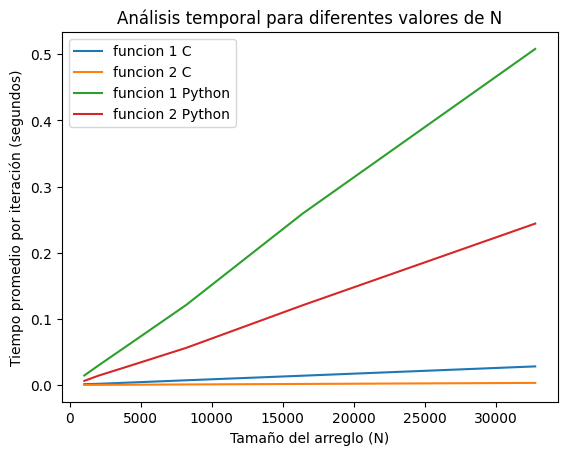

In [195]:
import time
import matplotlib.pyplot as plt

N_values = [1024, 2048, 4096, 8192, 16384 , 32768]

c_time1_values = []
c_time2_values = []
py_time1_values = []
py_time2_values = []

for N in N_values:

    c_start_time1 = time.time()
    for i in range(iter):
        rpta1_c = primera_sumatoria_c(N,a,b)
    c_end_time1 = time.time()
    c_time1_values.append(c_end_time1 - c_start_time1) 

    c_start_time2 = time.time()
    for i in range(iter):
        rpta2_c = segunda_sumatoria_c(N,a,b)
    c_end_time2 = time.time()
    c_time2_values.append(c_end_time2 - c_start_time2)


    py_start_time1 = time.time()
    for i in range(iter):
        rpta1_py = primera_sumatoria_py(N,a,b)
    py_end_time1 = time.time()
    py_time1_values.append(py_end_time1 - py_start_time1)

    py_start_time2 = time.time()
    for i in range(iter):
        rpta2_py = segunda_sumatoria_py(N,a,b)
    rpta2_py = segunda_sumatoria_py(N,a,b)
    py_end_time2 = time.time()
    py_time2_values.append(py_end_time2 - py_start_time2)

plt.plot(N_values, c_time1_values , label='funcion 1 C')
plt.plot(N_values, c_time2_values , label='funcion 2 C')
plt.plot(N_values, py_time1_values, label='funcion 1 Python')
plt.plot(N_values, py_time2_values, label='funcion 2 Python')

plt.xlabel('Tamaño del arreglo (N)')
plt.ylabel('Tiempo promedio por iteración (segundos)')
plt.title('Análisis temporal para diferentes valores de N')
plt.legend()
plt.show()

# asi cambiemos la cantidad de N_values en aumento 
# el resultado que obtenemos sigue indicando que la segunda funcion de C es más rapido que el resto , sobre todo a los tiempos de ejecución de Python
# ademas se vuelve a indica que la funcion que se demora más tiempo en rendir es la primera funcion de python

# el analisis temporal se enfatizo cuanto el tiempo aumenta para cuada funcion mientras la cantidad de N_values del arreglo van incrementando}

# esto indica que python es un lenguaje intepretado global y dinamico
# mientras C trata de un lenguaje compilado, se enfonca a las estrcuturas y es estatico lo cual hace que sea más rápido y eficiente
# a pesar que sea muy sencible a los datos


i) (3.0 puntos) Calcular y graficar el SpeedUP para los mismos rangos de N del inciso anterior. Considerar que el SpeedUP debe ser entre las funciones análogas entre las funciones en C y Python. Realizar comentarios acerca de sus resultados

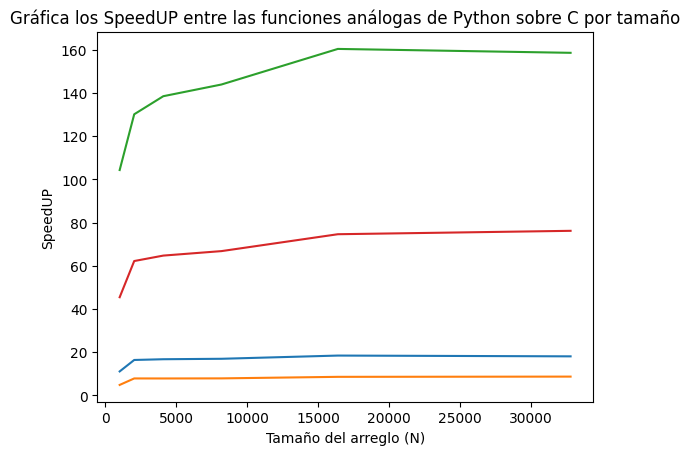

In [196]:
speedup1 = [py_time1_values[i] / c_time1_values[i] for i in range(len(N_values))]
speedup2 = [py_time2_values[i] / c_time1_values[i] for i in range(len(N_values))]
speedup3 = [py_time1_values[i] / c_time2_values[i] for i in range(len(N_values))]
speedup4 = [py_time2_values[i] / c_time2_values[i] for i in range(len(N_values))]

plt.plot(N_values, speedup1 , label='Py1/C1') # verde
plt.plot(N_values, speedup2 , label='Py1/C2') # azul
plt.plot(N_values, speedup3 , label='Py2/C1') # rojo
plt.plot(N_values, speedup4 , label='Py2/C2') # amarillo
plt.xlabel("Tamaño del arreglo (N)")
plt.ylabel("SpeedUP")
plt.title("Gráfica los SpeedUP entre las funciones análogas de Python sobre C por tamaño")
plt.show()

# se establece y concuerda que mientras aumentan los procesadores , el speedup se limite al procesamiento serial
# mientras mejoras se va limitando de acuerdo a los tiempos establecidos y ejecutados por cada funcion
# el que presenta una speedup mas elevado es Py1/C1 lo cual mejora el rendimiento del codigo, el que le sigue es Py2&C2  y ewl que posee menos rendimiento es Py2/C2
